In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
yelp=pd.read_csv('yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [5]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [9]:
yelp['text length']=yelp['text'].apply(lambda x: len(x.split(" ")))


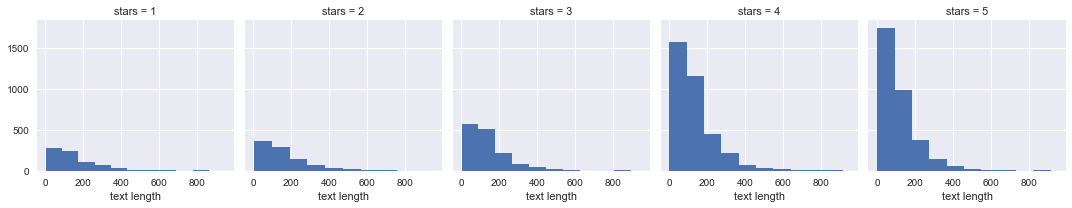

In [13]:
g=sns.FacetGrid(yelp,col='stars')
g=g.map(plt.hist,'text length')

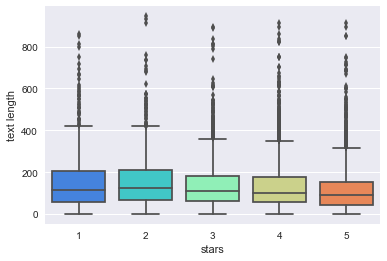

In [20]:
sns.boxplot(x='stars',y='text length',data=yelp,palette='rainbow')

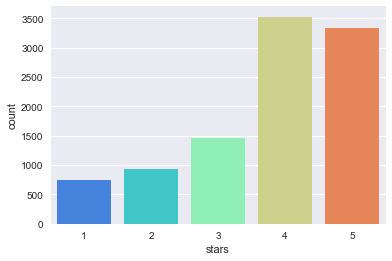

In [25]:
sns.countplot(x='stars',data=yelp,palette='rainbow')

In [29]:
df=yelp.groupby('stars').mean()
df

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,156.013351
2,0.719525,1.563107,0.875944,158.508091
3,0.788501,1.306639,0.694730,143.043806
4,0.954623,1.395916,0.670448,132.921441
5,0.944261,1.381780,0.608631,116.054840


In [30]:
df.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.865650
useful,-0.743329,1.000000,0.894506,0.690255
funny,-0.944939,0.894506,1.000000,0.844066
text length,-0.865650,0.690255,0.844066,1.000000


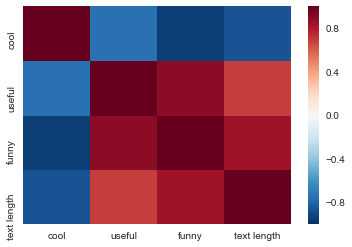

In [31]:
sns.heatmap(df.corr())

In [59]:
yelp_class=yelp[(yelp.stars==1) | (yelp.stars==5)]

In [70]:
x = yelp_class['text']
y = yelp_class['stars']

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [72]:
x=cv.fit_transform(x)

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=101)

In [75]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [76]:
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
pred=nb.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix,classification_report

In [79]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[159  69]
 [ 22 976]]
             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



In [80]:
from sklearn.feature_extraction.text import TfidfTransformer

In [81]:
from sklearn.pipeline import Pipeline

In [82]:
pipeline=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('classifier',MultinomialNB())])

In [83]:
x = yelp_class['text']
y = yelp_class['stars']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=101)

In [84]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('bow', CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [85]:
pred=pipeline.predict(x_test)

In [86]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[  0 228]
 [  0 998]]
             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



C:\Users\Disha\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
